In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from scipy.optimize import curve_fit
from imageio import imread
import scienceplots # Para obtener graficos de alta calidad
import glob

plt.style.use(['science','notebook','grid','std-colors'])
#plt.style.use(['nature','no-latex'])

os.getcwd()

'C:\\Users\\JAAL_\\Documents\\Sincronizar_Drive\\Tesis\\Redacción-tesis\\Imagenes-de-la-tesis-en-orden\\Figuras-oficiales-enumerados-hechas\\Figuras-capitulo-4\\Figura-8-9-ODMR\\ODMR-sin-campo'

In [6]:
# Para regresar a la carpeta 
os.chdir('C:\\Users\\JAAL_\\Documents\\Sincronizar_Drive\\Tesis\\Redacción-tesis\\Imagenes-de-la-tesis-en-orden\\Figuras-oficiales-enumerados-hechas\\Figuras-capitulo-4\\Figura-8-9-ODMR\\ODMR-sin-campo')

# Cargando la data obtenida del experimento para ODMR sin campo (Mejorar el código, que sea más legible)

C:\Users\JAAL_\AppData\Local\Temp\ipykernel_27464\1874109102.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag = imread(file[i][j])


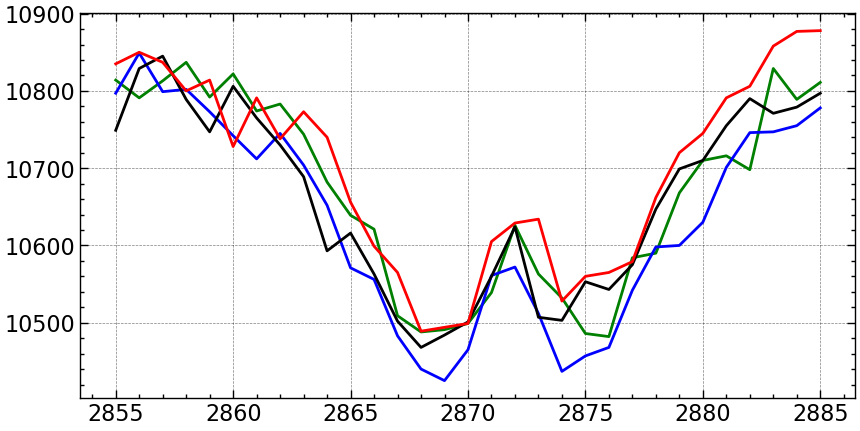

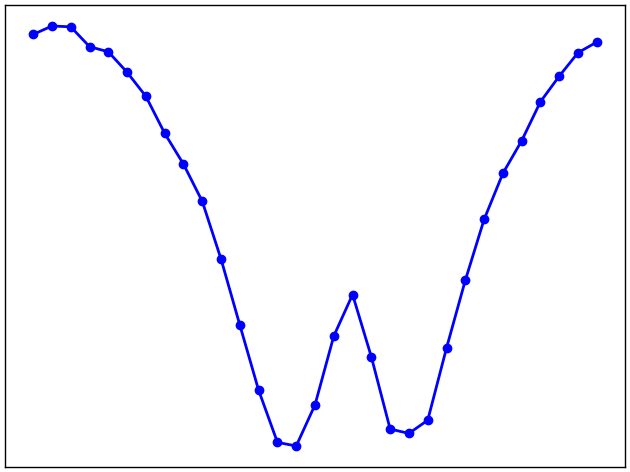

In [8]:
os.chdir('C:/Users/JAAL_/Documents/ODMR-jupyter-calculo-magnetometria/Datos-para-magnetometria/odmrsc-corte')
# ahora si se ubica en la carpeta una

########################## LECTURA ################################

nmedias = 64 # Número de medias
# devuelve la ruta especificada de datos
file = [glob.glob(f'{i}_image_*.png') for i in range(1, nmedias + 1)]

######################## FRECUENCIAS ###############################
    
my_range = np.arange(2870-15,2870+16,1)
x1 = [x for x in my_range] # El rango de frecuencias de las fotos en una lista

######################## Suma de la región de interes ##########################
'''
i = En el for indica el numero de experimento 
j = Indica el numero de frecuencia en la foto

Para hacer la modificación solo debo agarrar una zona de interes
'''

ODMR = []
for i in range(nmedias):
    n = list()
    for j in range(len(x1)):
        imag = imread(file[i][j])
        n.append(np.sum(imag))
    ODMR.append(n)

########### Grafica de algunos datos ########
plt.figure(figsize=(10,5))
for i, color in zip(range(4, 8), ['-g', '-b', '-k', '-r']):
    plt.plot(x1, ODMR[i], color)
plt.show()

ODMR = np.array(ODMR)
# Cálculo de la suma (media) y la desviación estándar para cada frecuencia (sobre el eje 0)
nt = np.sum(ODMR, axis=0)  # Suma para cada frecuencia
desviacion_estandar = np.std(ODMR, axis=0)  # Desviación estándar para cada frecuencia

# Normalización de la suma
norm_factor = np.max(nt) # Se debe normalizar tanto los datos como la desviación estandar por el mismo valor 
Nnt = nt / norm_factor
# Normalización de la desviación estándar
desviacion_estandar_normalizada = desviacion_estandar / norm_factor

    
# Estructura de datos para guardar 
# (guarda como dos columna / 1 columna las frecuencia / 2 columna la fluorescencia normalizada ) )
A = np.column_stack((x1, Nnt))

# Para regresar a la carpeta  
os.chdir('C:\\Users\\JAAL_\\Documents\\Sincronizar_Drive\\Tesis\\Redacción-tesis\\Imagenes-de-la-tesis-en-orden\\Figuras-oficiales-enumerados-hechas\\Figuras-capitulo-4\\Figura-8-9-ODMR\\ODMR-sin-campo')
np.savetxt('ODMR-15dBm.txt',A,fmt='%s') # Lo guardamos aqui y esto es lo que usaremos en el futuro
    
# Gráfica de los datos normalizados
plt.plot(x1, Nnt, '-ob')
plt.tick_params(direction='out', length=4, width=2, colors='black', labelsize=22)
plt.grid()
# Eliminar los ejes (ticks) de la subfigura
plt.xticks([])
plt.yticks([])
plt.savefig("ODMR-sin-campo-sin-etiquetas")
plt.show()

# ODMR sin campo (asociado a 1 transicion)

## Fitting del ODMR
El perfil pede ser modelado por una lorentziana en $\nu$
$$
\frac{I(\nu)}{I(0)} = 1 - f(\nu) \qquad f(\nu) = C_1\left( \frac{ \left(\frac{\Gamma}{2}\right)^2}{(\nu-\nu_{+})^2 + \left(\frac{\Gamma}{2}\right)^2} \right) + C_2\left(\frac{ \left(\frac{\Gamma}{2} \right)^2 }{ (\nu-\nu_{-})^2 + \left(\frac{\Gamma}{2}\right)^2}  \right) \quad I(\nu) = \int_{\tau} \text{PL}_{(t)}\;dt 
$$

donde:
- $\Gamma$ corresponde al ''ancho completo a la mitad del máximo'' (full-width at half-maxmium ''FWHM'') de cada lorentziana
- $C$ detremina el ''contraste'', la caida fraccional en intensidad cuando el microondas esta sintonizado en resonancia
- $\nu_{+}$ y $\nu_{-}$ las frecuencias de transición 
- $\frac{I(\nu)}{I(0)}$ respresenta la disminución inducida por la normalizada intensidad

[2.67977222e-02 2.78564323e-02 6.01064545e+00 6.18588776e+00
 2.86808392e+03 2.87544860e+03]


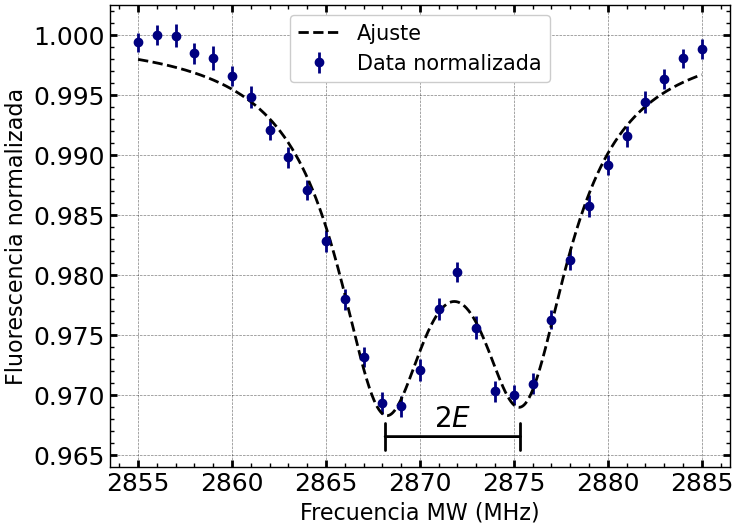

In [69]:
dataODMR = np.loadtxt('./ODMR-15dBm.txt')
fmw = dataODMR[:,0] # eje X
y = dataODMR[:,1] # eje Y 
'''Ejemplo de leyenda: "Barras de error amplificadas por un factor de 10 para mejorar la visualización."'''
scale_factor = 10 # es necesario para visualizar los errores relativos
yer = desviacion_estandar_normalizada * scale_factor # el error
gammae = 2.8025

nu_menos_prueba = 2868
nu_mas_prueba = 2875.5

def func(fmw,c1,c2,g1,g2,nu_menos,nu_mas):
	return 1 - c1*(((g1/2)**2)/((fmw-(nu_mas))**2+(g1/2)**2)) - c2*(((g2/2)**2)/((fmw-(nu_menos))**2+(g2/2)**2))

xfit = np.linspace(min(fmw),max(fmw),1000)
parametros_optimos, matriz_covarianza = curve_fit(func, fmw, y, p0=(1,3,3,3,nu_menos_prueba,nu_mas_prueba))
print(parametros_optimos)

plt.errorbar(fmw,y,yerr=yer, fmt='o',color='navy',label='Data normalizada')
plt.plot(xfit,func(xfit,*parametros_optimos),'--',label = "Ajuste", color = 'black') # grafico ajuste
plt.tick_params(direction='in', length=5, width=2, colors='black',labelsize=18) # esto para colocar las lineas de referencia
plt.ylim(0.964)
ax = plt.gca() # Obtener los ejes actuales y eliminar los ticks del eje Y
ax.annotate('', xy=(2868, 0.9665), xytext=(2875.5, 0.9665),
            arrowprops=dict(arrowstyle='|-|',lw=2),
            fontsize=10, ha='center')
ax.text(2871.75, 0.968, r'$2E$', fontsize=20, ha='center', va='center')
plt.xlabel('Frecuencia MW (MHz)')
plt.ylabel('Fluorescencia normalizada')

plt.grid(True)
plt.legend(fontsize=15)
plt.savefig("ODMR-sin-campo")
plt.show()

## Calculo de parametros D y E
Para el caso presente de campo cero se puede calcular del Hamiltoniano del NV las frecuencias $\nu_{\pm} = D \pm E$. Por lo tanto del perfil se puede hallar los siguientes parametros experimentales
\begin{align}
D &= \frac{\nu_{+} + \nu_{-}}{2} \\
E &= \frac{\nu_{+} - \nu_{-}}{2}
\end{align}

In [33]:
D = (nu_mas_prueba + nu_menos_prueba)/2 
E = (nu_mas_prueba - nu_menos_prueba)/2
print(f'D:{D} MHz')
print(f'E:{E} MHz')

D:2871.75 MHz
E:3.75 MHz
